## What is sentiment analysis?

Sentiment analysis is a Natural Language Processing (NLP) technique for determining the emotional tone behind a piece of text, such as a social media post, survey response, or product review. It aims to classify the sentiment expressed in the text as positive, negative, or neutral.

Here are some practical applications of sentiment analysis:

1. Marketing: Sentiment analysis can be used by companies to understand how customers feel about their brand, products, and services. This information can be used to improve customer experience and make data-driven marketing decisions.

2. Social media monitoring: Sentiment analysis can be used to monitor and analyze social media conversations, including mentions of brands and products, to track brand reputation and customer sentiment.

3. Customer service: Sentiment analysis can be used to automate customer service by identifying customer issues and emotions in real-time. This can help companies respond quickly to customer needs and resolve issues more efficiently.

4. Product and service reviews: Sentiment analysis can be used to analyze customer reviews and feedback on products and services to understand customer satisfaction and identify areas for improvement.

5. Political analysis: Sentiment analysis can be used to analyze political speeches, debates, and social media posts to understand public opinion and track political sentiment.

6. Financial analysis: Sentiment analysis can be used to analyze news articles, analyst reports, and social media posts to understand market sentiment and make data-driven investment decisions.


## Sentiment analysis in Python

Learning sentiment analysis in Python provides a strong foundation for NLP and machine learning, and opens up opportunities to apply these skills to a variety of real-world problems.

Here is a general outline of the steps involved in sentiment analysis in Python:

1. Data collection: The first step is to gather a large dataset of text data that has already been labeled with sentiment. This can be done by scraping online reviews, social media posts, or other sources of text data.

2. Text preprocessing: Before building a model, the text data needs to be cleaned and preprocessed. This can involve removing punctuation, stop words, and special characters, and converting the text to lowercase.

3. Feature extraction: Next, features need to be extracted from the text data to train a machine learning model. Common feature extraction techniques for sentiment analysis include bag-of-words and TF-IDF.

4. Model training: Once features have been extracted, a machine learning model can be trained on the labeled data. Common algorithms used for sentiment analysis include logistic regression, Naive Bayes, and decision trees.

5. Model evaluation: After the model has been trained, its accuracy needs to be evaluated on a separate validation dataset to ensure that it generalizes well to new data.

6. Model deployment: Finally, the trained model can be deployed in a production environment to classify new text data and predict its sentiment.

Python provides several libraries for sentiment analysis, including the Natural Language Toolkit (NLTK), spaCy, and scikit-learn, that can be used to perform each of these steps.

## Why Python for sentiment analysis?

1. Python has a rich set of libraries for NLP, including the Natural Language Toolkit (NLTK), spaCy, and gensim, which provide tools for tokenization, stemming, lemmatization, and other NLP tasks.

2. Python also has a strong machine learning library, scikit-learn, which provides a wide range of algorithms for sentiment analysis, including logistic regression, Naive Bayes, decision trees, and others.

3. With its large and active community, Python has a wealth of resources and tutorials for sentiment analysis, including pre-trained models and datasets.

4. Python has a straightforward syntax and is easy to learn, making it a great language for NLP and machine learning beginners.

## Load the IMDB dataset

In [1]:
import pandas as pd
movies = pd.read_csv('/Users/brindhamanivannan/NLP/Sentiment_Analysis/IMDB_sample.csv')
movies

,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0
...,...,...,...
7496,7334,Although this film is somewhat filled with eig...,1
7497,11638,Bo Derek's beauty and John Derek's revolutiona...,1
7498,19851,I have seen every episode of this spin off. I ...,0
7499,8114,"A comedy gem. Lots of laugh out loud moments, ...",1


In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7501 non-null   int64 
 1   review      7501 non-null   object
 2   label       7501 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 175.9+ KB


In [3]:
movies['label'].value_counts()

0    3782
1    3719
Name: label, dtype: int64

In [4]:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies.label.value_counts())


Number of positive and negative reviews:  0    3782
1    3719
Name: label, dtype: int64


In [5]:
# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movies.label.value_counts() / len(movies))

Proportion of positive and negative reviews:  0    0.504199
1    0.495801
Name: label, dtype: float64


In [6]:
movies['review']

0       This short spoof can be found on Elite's Mille...
1       A singularly unfunny musical comedy that artif...
2       An excellent series, masterfully acted and dir...
3       The master of movie spectacle Cecil B. De Mill...
4       I was gifted with this movie as it had such a ...
                              ...                        
7496    Although this film is somewhat filled with eig...
7497    Bo Derek's beauty and John Derek's revolutiona...
7498    I have seen every episode of this spin off. I ...
7499    A comedy gem. Lots of laugh out loud moments, ...
7500    ...about the importance of being young, having...
Name: review, Length: 7501, dtype: object

In [8]:
length_reviews = movies['review'].apply(len)
length_reviews


0        667
1       2982
2        669
3        691
4       1087
        ... 
7496     633
7497     650
7498     654
7499     918
7500     336
Name: review, Length: 7501, dtype: int64

In [9]:
# How long is the longest review
print(max(length_reviews))

10321


In [10]:
# How long is the shortest review
print(min(length_reviews))

52


## Sentiment analysis types and approaches

Levels of granularity

- document level

Example: whole review of a product

- sentence level 

Example: Determine if an opinion expressed in each sentence is positive, negative, or neutral

- aspect level 

Example: Expressing opinions about different features of a product. "The camera in this phone is pretty good but the battery life is disappointing."

The sentiment analysis task is usually modeled as a classification problem where using some historical data with known sentiment, we need to predict the sentiment of a new piece of text.

## What is the valence of a sentence?

The valence of a sentence refers to its emotional tone or sentiment, typically expressed as positive, negative, or neutral. We can calculate the valence score of a text, using Python's textblob library.

In [12]:
!pip install textblob


     |████████████████████████████████| 636 kB 5.9 MB/s eta 0:00:01


In [13]:
text = "Today was a great day"

from textblob import TextBlob

my_valence = TextBlob(text)
my_valence.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

The sentiment property returns a tuple: polarity, which is measured on the scale from [-1.0 to 1.0], where -1.0 is very negative, 0 is neutral and +1.0 is very positive. 

The second element in the tuple displays the subjectivity, measured from [0.0 to 1.0] where 0.0 is very objective and 1.0 is very subjective. 

So our example is rather positive and subjective.
    
    

## Type of sentiment analysis algorithms

The algorithms used for sentiment analysis could be split into 2 main categories. 

1. The first is rule or lexicon based. Such methods most commonly have a predefined list of words with a valence score. For example, nice could be +2, good +1, terrible -3, and so on. The algorithm then matches the words from the lexicon to the words in the text and either sums or averages the scores in some way. As an example, let's take the sentence, 'Today was a good day.' Each word gets a score, and to get the total valence we sum the words. In this case, we have a positive sentence. 

2. A second category is automated systems, which are based on machine learning. This is going to be our focus in this course. The task is usually modeled as a classification problem where using some historical data with known sentiment, we need to predict the sentiment of a new piece of text.

## Automated or rule-based?

Which method should one use? 

A machine learning sentiment analysis relies on having labeled historical data whereas lexicon-based methods rely on having manually created rules or dictionaries. Lexicon-based methods fail at certain tasks because the polarity of words might change with the problem, which will not be reflected in a predefined dictionary. However, lexicon-based approaches can be quite fast, whereas Machine learning models might take a while to train. At the same time, machine learning models can be quite powerful. So, the jury is still out on that one. Many people find that a hybrid approach tends to work best in many, usually complex scenarios.

## Detecting the sentiment of Tale of Two Cities

In [14]:
two_cities = "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only."

In [15]:
print(two_cities)


It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.


In [16]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object  
blob_two_cities = TextBlob(two_cities)

# Print out the sentiment 
print(blob_two_cities.sentiment)

Sentiment(polarity=0.022916666666666658, subjectivity=0.5895833333333332)


## Comparing the sentiment of two strings

In [18]:
annak = "Happy families are all alike; every unhappy family is unhappy in its own way"
catcher = "If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth."

In [19]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object 
blob_annak = TextBlob(annak)
blob_catcher = TextBlob(catcher)

# Print out the sentiment   
print('Sentiment of annak: ', blob_annak.sentiment)
print('Sentiment of catcher: ', blob_catcher.sentiment)

Sentiment of annak:  Sentiment(polarity=0.05000000000000002, subjectivity=0.95)
Sentiment of catcher:  Sentiment(polarity=-0.05, subjectivity=0.5466666666666666)


It shouldn't be surprising that the opening sentence of _Catcher in the Rye_ has a negative score, whereas the one from _Anna Karenina_ has a slightly positive one.

## What is the sentiment of a movie review?

In [22]:
titanic = "Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of the survivors of the Titanic, Rose DeWitt Bukater, who had heard of the exploration of the wreck on television and is flown to the boat where the search is being led from to tell of what she remembers to help the search. She gets to telling her memory of the one and only voyage of the Titanic. With this, the scene shifts to Southhampton, Ireland where the Titanic set sail from on April 10, 1912 as all the passengers are boarding. After another stop on the Irish coast Titanic went out to see on its maiden voyage across the Atlantic bound for New York. Historically the first few days of the voyage went by uneventful, but the fictional plot of the story is developed during this time as Rose sees the hopeless entrapement of an engagement that she is in to the wealthy Cal Hockley and falls in love with third class passenger, Jack Dawson. Captain Smith alledgedly as shown in the movie was urged by the White Star Line Director to increase the speed of the ship so they would make the newspaper headlines and receive extra publicity by arriving in New York on Thursday night and not on Friday morning as planned. Smith then ordered the fateful decision going against his thirty-two years of experience to stretch the Titanic's legs out to full speed. The Titanic had reports that the waters in the Atlantic they were sailing in were full of icebergs, but they ignored these warnings and proceeded at full speed as shown in the movie. On April 15, 1912 at 11:39, an iceberg was sighted. They attempted to shut off the engines and turn the ship out of the path of the iceberg but there was not enough time and the ship hit the iceberg on the starboard side as depicted in the film. The portrayal of the many small holes in the side of the ship and not one large gash along the side is accurate. The crew of Titanic sent out distress calls and set off distress rockets as shown until 2:18 when the lights finally failed. The lights of the California were spotted six miles away but they failed to realize what was going on and did not respond to Titanic's many pleas for help. The California had tried earlier in the day to warn Titanic of the severe ice that had caused them to stop their trip but Titanic had brushed them off causing the California to turn off its radio and leave the Titanic on its own. The first class women and children were the first as depicted to be put into the twenty lifeboats that were on the ship. Overwhelmingly the third class passengers suffered the most amount of deaths of any class and the crew was hit hard in this tragedy too. The word of White Star Line employees and first class passengers was believed over that of second and third class passengers when authorities were trying to gain information of the sinking. Also, the metal that was used to build the Titanic has been found in recent years under conditions of severe cold, which were experienced the night Titanic sank to be extremely brittle. Overall, the basic plot is very accurate in its portayal of the events and the times at which these events took place on the Titanic.<br /><br />Many of the characters in the story were not real and created simply for the purpose of the movie or as composite characters to represent possible characteristics and ideas of people on the ship. The core group of Rose, Jack, Cal, and Rose's mother all were fictional characters added into the story as they represent different groups of people from the time. Yet many characters such as the Unsinkable Molly Brown; Captain Edward Smith; the ship designer, Thomas Andrew; the White Star Line Representative, Bruce Ismay; and all of the Titanic's officers were real. The maiden voyage was going to be Captain Edward Smith's last voyage anyway as he planned to retire afterwards. He had been a part of the White Star Line since 1880 where he worked his way up to his status as the Millionaire's Captain when the Titanic sunk. The portrayals of the officers is accurate as only four survived the tragedy except for the officer who threatened to kill all of the passengers of the ship with his pistol. He is on record as acting heroicly and was misportrayed to the point that James Cameron apologized and evoked a monument in his honor in the officer's former Canadian hometown. As shown in the movie there was a language problem between the crew and many of the lower-class passengers from non-English speaking nations. In addition, Officer Lowe was the only officer who came back in the lifeboat as depicted. The old people shown in their bed as the water came in their room were based on the Strauss'. Not wanting to leave her husband's side Mrs. Strauss refused to get in her lifeboat and died with her husband on the Titanic. Furthermore, Mr. Goggenheim who was shown sipping his brandy and smoking a cigar reportedly did go out like this dressed in his best. The richest man on the ship, John Jacob Astor, who owned most of Manhattan died nonetheless as well, but his much younger wife was saved in a lifeboat. In addition, Molly Brown was saved and later had medals made up for the crew of the Carpethia that picked the survivors of Titanic up from the water. Her ticket on the Titanic had cost over four-thousand dollars and by the end of her life she ended up broke. All of the interiors of the ship were masterfully replacated down to the last pieces of china and silverware. The gymnasium, which is hardly seen is recreated perfectly with all of the machines reproduced to match those seen in old photographs. The wonderful outfits and costuming were an excellent re-creation of the Post-Victorian era of 1912. The rich at this time practically ruled everything, as the women's suffrage movement had not quite gotten moving yet. Women during this time often married for financial security as Rose was considering doing and normally took a back seast status to their husbands as Cal wished for Rose to do. The rich did not take well to `new money' such as Molly Brown as depicted. Everything of the time was very formal. Women had to be escorted to dinner by a male figure as seen with in the dining scenes. Smoking was not very common among women of the time but holders of cigarettes, which were just coming in at the time were used as seen with Rose in the movie. Men of the time generally smoked cigars not cigarettes. Women were constained physically by their corsets and socially by society. Although James Cameron had no background in historical films he brought in experts of Titanic coupled with two years spent cross-referencing the history of the Titanic and few liberties were taken. The beautiful cinematography and special effects also helped to make the film even more breathtaking.<br /><br />A recognizable message can be seen in the movie Titanic as the people on the ship had about three hours to contemplate their demise. The director, James Cameron, shows the various reactions to this time of crisis in people's lives. Everyone reacts differently and he gets you to think of how you might have reacted had you been in that situation on the Titanic on that fateful night. In addition, this film is a reflection of the 1990's when it was produced as it gives a look into the wreck of the Titanic. Only in the past fifteen years has the site of the actual Titanic been found and explored. This movie was able to give us a deeper look into a disaster that many would not have viewed. However, the moral question of whether people today should be taking treasures from the wreck of an underwater graveyard is posed. There have been attempts to stop treasure seeking missions such as the one portrayed in Titanic but all have failed. As it stands today anyone can make a voyage to the Titanic and take whatever valuables they as portrayed in the film showing the general values of our time on this matter.<br /><br />Technically the film is very well done. To get footage of the wreck at the bottom of the ocean it took twelve dives to get all of the footage needed for the movie. In addition, a special camera had to be created to withstand the intense pressure at the bottom of the ocean. Cameron did not plan on using the probe to go as far inside Titanic as anyone has in the 88 years since the ship sunk but it worked out that this provided an unique perspective into the ship. Furthermore, throughout the film fade ins and outs from the wreck of Titanic to the scene of Titanic during its actual voyage. This shift between the modern scene to the past scene during the voyage works as an excellent transition that makes the story easy to follow in aclear manner. At the very beginning of the movie a septune recreation is used to recreate the scene when the actual people left the European coast on Titanic giving it distinction from the rest of the events of the film.<br /><br />Titanic plays almost like a historical biography and is like a work of art, a true epic. Like most history novels, we know the ending, but it doesn't take away from the wonderful treats that can be found in this picture. Certain aspects of this film are Academy Award material including costuming, sound, cintematography, and editing. If you like interesting characters that will give you an insight into the life of characters in the early 1900's and how they face disaster, then this movie definitely is for you.<br /><br />"


In [23]:
print(titanic)

Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of the

In [25]:
# Import the required packages
from textblob import TextBlob

# Create a textblob object  
blob_titanic = TextBlob(titanic)
#blob_titanic


In [26]:
# Print out its sentiment  
print(blob_titanic.sentiment)

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)


Did you notice that the polarity is around 0.2 and the review is classified as positive (has a label of 1)?

## Let's build a word cloud!

A word cloud is an image composed of words with different sizes and colors. They can be especially useful in sentiment analysis. 

The size of the text corresponds to the frequency of the word. The more frequent a word is, the bigger and bolder it will appear on the word cloud.

## Why are word clouds so popular? 

Word clouds are popular for several reasons:

1. Simplicity: Word clouds provide a simple and visual representation of text data, making it easy for people to understand and interpret large amounts of text information.

2. Customizability: Word clouds can be customized to fit a particular purpose or design, by adjusting font size, color, and shape.

3. Versatility: Word clouds can be applied to a wide range of text data, including articles, books, social media posts, and survey responses.

4. Immediacy: Word clouds provide immediate insights into the most frequently used words in a text, making it a quick and efficient way to gain a high-level understanding of the content.

5. Aesthetics: Word clouds are visually appealing, making them an attractive way to display text data in presentations, reports, and other documents.

These factors have contributed to the popularity of word clouds as a tool for text analysis and data visualization.

However, they have their drawbacks. Sometimes they tend to work less well. All the words plotted on the cloud might seem unrelated and it could be difficult to draw a conclusion based on a crowded word cloud. Secondly, if the text we work with is large, a word cloud might require quite a lot of preprocessing steps before it appears sensible and uncluttered.

## Word cloud in Python

In [28]:
!pip install wordcloud


In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

two_cities = "It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only."

In [32]:
# Define the wordcloud object

cloud_two_cities = WordCloud().generate(two_cities)
cloud_two_cities

In [51]:
?WordCloud # to see all arguments of the function

Object `WordCloud # to see all arguments of the function` not found.


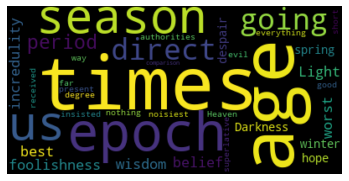

In [35]:
plt.imshow(cloud_two_cities, interpolation='bilinear')
plt.axis('off')
plt.show()

Word clouds are very intuitive and a great and fast way to get a first impression on what a piece of text is talking about.

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

east_of_eden = "I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich."

In [37]:
# Generate the word cloud from the east_of_eden string
cloud_east_of_eden = WordCloud(background_color="white").generate(east_of_eden)
cloud_east_of_eden

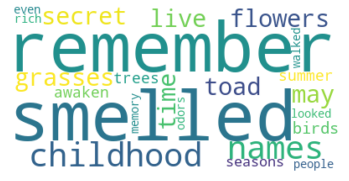

In [38]:
plt.imshow(cloud_east_of_eden, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
illuminated = "I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad."

In [40]:
cloud_illuminated = WordCloud(background_color="white").generate(illuminated)
cloud_illuminated

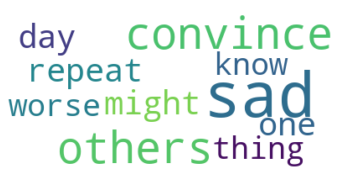

In [41]:
plt.imshow(cloud_illuminated, interpolation='bilinear')
plt.axis('off')
plt.show()

## Building a word cloud of the top 100 positive reviews

In [44]:
with open("/Users/brindhamanivannan/Desktop/KaggleX/DataCamp/NLP/descriptions.txt", "r") as file:
    descriptions = file.read()

In [46]:
#descriptions

The string descriptions has been created by concatenating the descriptions of the top 100 positive reviews. 

A movie-specific set of stopwords (very frequent words, such as the, a/an, and, which will not be very informative and we'd like to exclude from the graph) is available as my_stopwords. 

Recall that the interpolation argument makes the word cloud appear more smoothly.

In [48]:

my_stopwords = {"can't", 'more', "here's", 'we', 'does', 'our', 'each', 'here', 'all', 'and', "i'll", 'com', 'this', 'up', "shouldn't", 'what', 'you', 'however', 'it', "how's", 'those', "hadn't", 'some', 'so', 'been', 'down', 'www', "you're", 'ourselves', "mustn't", 'these', "let's", 'where', 'too', 'until', 'between', 'not', "it's", 'for', 'its', 'the', "don't", 'of', 'at', "doesn't", 'very', 'but', 'just', 'them', 'also', "why's", 'herself', 'on', 'or', 'under', 'off', "we'll", 'being', 'has', "he's", 'because', 'same', "we're", 'get', 'into', "she'll", 'to', 'yourself', "that's", "weren't", "where's", 'have', 'about', 'were', 'in', "wouldn't", 'themselves', 'k', "she's", 'further', 'r', 'else', 'then', 'be', 'nor', 'a', 'itself', "they'd", 'yours', 'cannot', 'film', "you'll", 'how', 'while', "they're", 'why', 'above', "they've", "what's", 'any', 'your', 'doing', "i've", 'again', 'watch', 'had', 'me', 'could', "you'd", "shan't", 'himself', 'otherwise', "isn't", "when's", 'there', 'they', "wasn't", "won't", 'other', "couldn't", "didn't", "we'd", 'http', 'only', "they'll", 'myself', 'yourselves', 'if', 'hence', 'since', 'was', "he'll", 'ever', 'own', 'therefore', 'no', 'after', 'an', 'before', 'over', 'hers', 'his', 'i', 'theirs', "she'd", 'against', 'having', 'from', "he'd", 'through', 'who', 'my', 'when', 'ought', 'their', 'would', 'both', 'movie', 'did', 'below', "hasn't", 'she', 'that', "there's", 'few', "we've", 'br', 'most', 'with', "haven't", 'is', "who's", 'can', 'him', "you've", 'her', "aren't", 'am', 'than', 'should', 'he', 'like', 'ours', 'films', "i'd", 'as', 'are', 'which', 'movies', 'whom', "i'm", 'by', 'once', 'such', 'out', 'do', 'shall', 'during'}

In [49]:
type(my_stopwords)

set

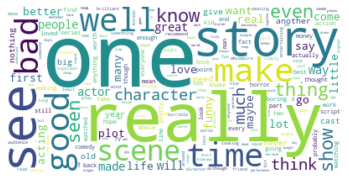

In [52]:
# Import the word cloud function  
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and generate a word cloud image 
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(descriptions)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()